 The Nobel Foundation has made a dataset available of all prize winners from the start of the prize, in 1901, to 2016
 we want to  achieve some insights from this dataset.


<h3>which sex and which country is the most commonly represented?</h3>

In [1]:
# Loading in required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading in the Nobel Prize data
df=pd.read_csv('E:\work\DataSets\\nobel.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  911 non-null    int64 
 1   category              911 non-null    object
 2   prize                 911 non-null    object
 3   motivation            823 non-null    object
 4   prize_share           911 non-null    object
 5   laureate_id           911 non-null    int64 
 6   laureate_type         911 non-null    object
 7   full_name             911 non-null    object
 8   birth_date            883 non-null    object
 9   birth_city            883 non-null    object
 10  birth_country         885 non-null    object
 11  sex                   885 non-null    object
 12  organization_name     665 non-null    object
 13  organization_city     667 non-null    object
 14  organization_country  667 non-null    object
 15  death_date            593 non-null    ob

In [4]:
df.sample(n=6)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
235,1947,Medicine,The Nobel Prize in Physiology or Medicine 1947,"""for their discovery of the course of the cata...",1/4,344,Individual,"Gerty Theresa Cori, née Radnitz",1896-08-15,Prague,Austria-Hungary (Czech Republic),Female,Washington University,"St. Louis, MO",United States of America,1957-10-26,"St. Louis, MO",United States of America
707,2000,Chemistry,The Nobel Prize in Chemistry 2000,"""for the discovery and development of conducti...",1/3,730,Individual,Alan G. MacDiarmid,1927-04-14,Masterton,New Zealand,Male,University of Pennsylvania,"Philadelphia, PA",United States of America,2007-02-07,"Drexel Hill, PA",United States of America
873,2013,Peace,The Nobel Peace Prize 2013,"""for its extensive efforts to eliminate chemic...",1/1,893,Organization,Organisation for the Prohibition of Chemical W...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,1952,Peace,The Nobel Peace Prize 1952,NaN,1/1,513,Individual,Albert Schweitzer,1875-01-14,Kaysersberg,Germany (France),Male,NaN,NaN,NaN,1965-09-04,Lambaréné,Gabon
771,2005,Chemistry,The Nobel Prize in Chemistry 2005,"""for the development of the metathesis method ...",1/3,795,Individual,Robert H. Grubbs,1942-02-27,"Possum Trot, KY",United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,NaN,NaN,NaN
418,1972,Chemistry,The Nobel Prize in Chemistry 1972,"""for their contribution to the understanding o...",1/4,243,Individual,William H. Stein,1911-06-25,"New York, NY",United States of America,Male,Rockefeller University,"New York, NY",United States of America,1980-02-02,"New York, NY",United States of America


 <h3>Category diistribution of nobel prizes</h3> 

(array([175.,   0., 113.,   0., 211.,   0., 130.,   0., 204.,  78.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

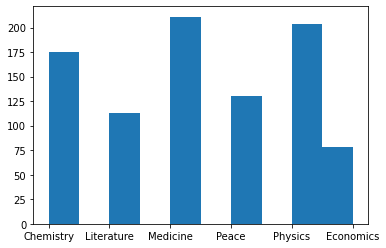

In [6]:
#sns.distplot(df['category'],kde=False)
plt.hist(df['category'])

<h3>which sex and which country is the most commonly represented?</h3>

In [7]:
df.sex.value_counts()

Male      836
Female     49
Name: sex, dtype: int64

In [8]:
df.birth_country.value_counts().head(n=20)

United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Canada                       18
Netherlands                  18
Russia                       17
Italy                        17
Switzerland                  16
Austria                      14
Norway                       12
Denmark                      11
China                        11
Australia                    10
Scotland                      9
South Africa                  9
Belgium                       9
Germany (Poland)              8
Name: birth_country, dtype: int64

<h3>When did the USA start to dominate the Nobel Prize charts?</h3>

In [9]:
df['decade']=(df['year']//10)*10

In [10]:
# Calculating the proportion of USA born winners per decade
'''
at first create a dataframe from total countries in each decade, then create a dataframe from us country in each decade,
then merge two dataframes on common column('decade'),at the end , add new column to dataframe  as fraction of us out of all
countries.
'''
 
total_contries=df.groupby('decade')['birth_country'].count().to_frame()
usa_country=df[df['birth_country']=='United States of America']
usa_countries=usa_country.groupby('decade')['birth_country'].count().to_frame() 
 

df_merge=total_contries.merge(usa_countries,on='decade')

df_merge['fraction']=df_merge['birth_country_y']/df_merge['birth_country_x']

final_table=df_merge.loc[:,'fraction'].to_frame()
final_table.reset_index(inplace=True)



In [11]:
final_table

,decade,fraction
0,1900,0.017857
1,1910,0.078947
2,1920,0.074074
3,1930,0.254545
4,1940,0.325000
5,1950,0.295775
6,1960,0.280000
7,1970,0.320388
8,1980,0.329787
9,1990,0.415842


Text(0.5, 1.0, 'the proportion of USA born winners per decade')

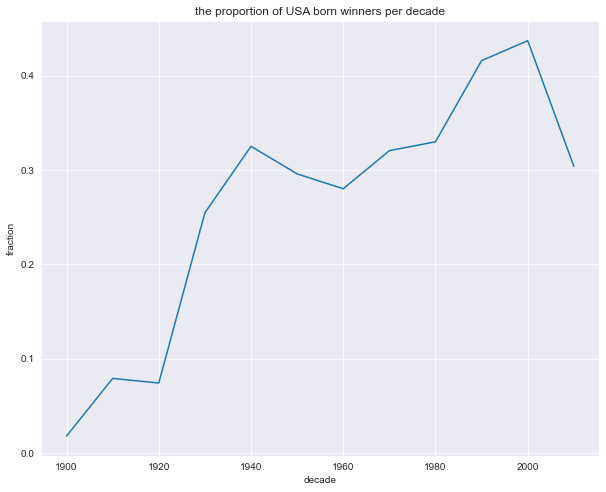

In [12]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(10,8))
p=sns.lineplot(x='decade',y='fraction',data=final_table,ax=ax)
ax.set_title('the proportion of USA born winners per decade')



<h3>What is the gender of a typical Nobel Prize winner?</h3>

How significant is this imbalance between men and women nobel prize winners? And is it better or worse within specific prize categories like physics, medicine, literature, etc.?

In [13]:
# Calculating the proportion of female winners per decade
fraction_women=df.groupby('decade')['sex'].count()/df['sex'].count()
fraction_women

decade
1900    0.063277
1910    0.042938
1920    0.061017
1930    0.062147
1940    0.045198
1950    0.080226
1960    0.084746
1970    0.116384
1980    0.106215
1990    0.114124
2000    0.134463
2010    0.089266
Name: sex, dtype: float64

In [15]:
# Calculating the proportion of female winners  for each branch per decade
df['female_winner']=df['sex']=='Female'
fraction_women1=df.groupby(['decade','category'])['female_winner'].mean()
g=fraction_women1.to_frame().reset_index()
g

,decade,category,female_winner
0,1900,Chemistry,0.000000
1,1900,Literature,0.100000
2,1900,Medicine,0.000000
3,1900,Peace,0.071429
4,1900,Physics,0.076923
...,...,...,...
61,2010,Economics,0.000000
62,2010,Literature,0.285714
63,2010,Medicine,0.125000
64,2010,Peace,0.400000


Text(0.5, 1, 'proportion of female winners  for each branch per decade')

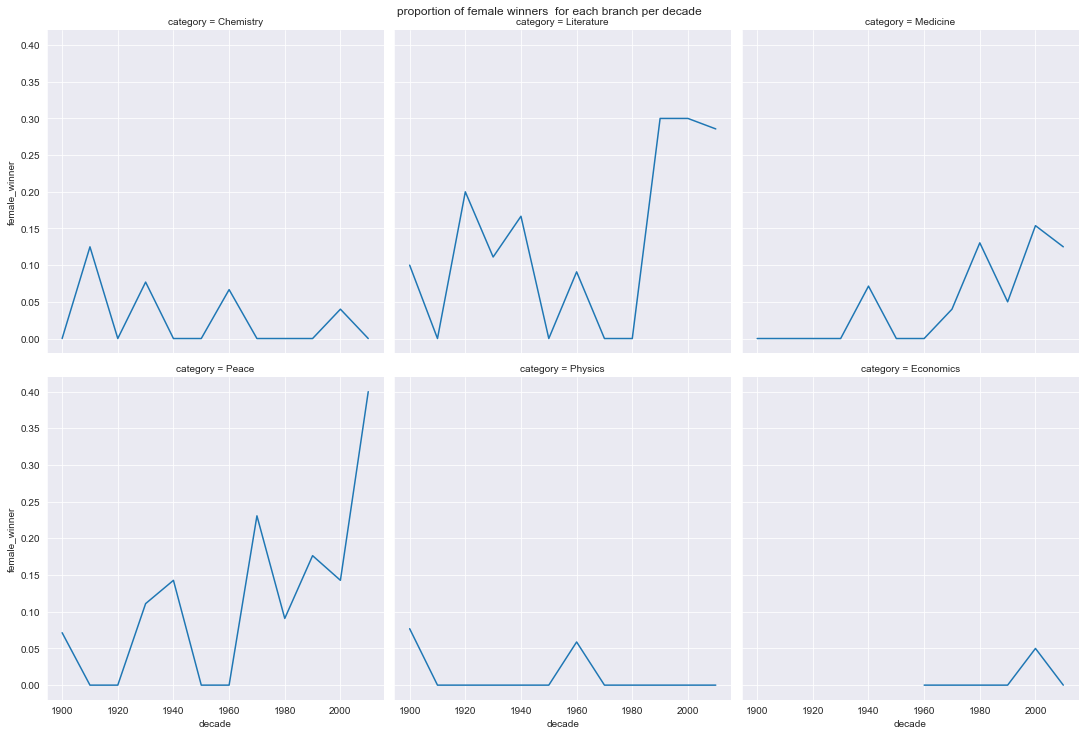

In [16]:
g=sns.relplot(x='decade',y='female_winner',data=g ,kind='line',col='category', col_wrap=3)
g.fig.suptitle('proportion of female winners  for each branch per decade',y=1)

<h3>The first woman to win the Nobel Prize</h3>

who was the first woman to receive a Nobel Prize? And in what category?

In [17]:
k=df.loc[df['sex']=='Female'].nsmallest(1,'year')
k


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,1900,True


<h3>winners that have received 2 or more prizes</h3>

In [18]:

df.groupby('full_name').filter(lambda x: len(x) >=2)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,1900,True
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,1910,True
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1910,False
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1940,False
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,1950,False
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950,False
298,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",United States of America,Male,University of Illinois,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,1950,False
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,United Kingdom,Male,University of Cambridge,Cambridge,United Kingdom,2013-11-19,Cambridge,United Kingdom,1950,False
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,1960,False
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1960,False


The list of repeat winners contains some illustrious names! We again meet Marie Curie, who got the prize in physics for discovering radiation and in chemistry for isolating radium and polonium. John Bardeen got it twice in physics for transistors and superconductivity, Frederick Sanger got it twice in chemistry, and Linus Carl Pauling got it first in chemistry and later in peace for his work in promoting nuclear disarmament.

 <h3>Age distribution of Nobel Prize winners</h3>

In [19]:
# Calculating the age of Nobel Prize winners
df['birth_date']=pd.to_datetime(df['birth_date'])
df['age']=df['year']-df['birth_date'].dt.year



Text(0.5, 1.02, 'Age distribution of Nobel Prize winners')

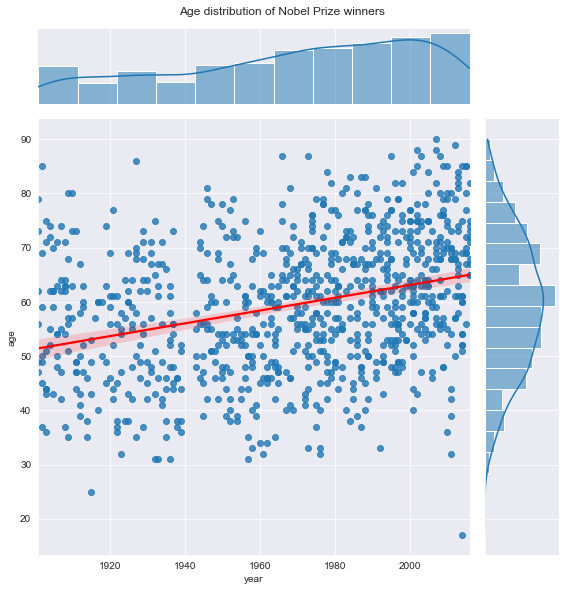

In [39]:
#fig,ax=plt.subplots()
g=sns.JointGrid(data=df,x='year',y='age',height=8)
g.plot_joint(sns.regplot,line_kws={'color':'red'})
g.plot_marginals(sns.histplot,kde=True)
g.fig.suptitle('Age distribution of Nobel Prize winners',y=1.02)

Text(0.5, 1.02, 'Age distribution of Nobel Prize winners for each category')

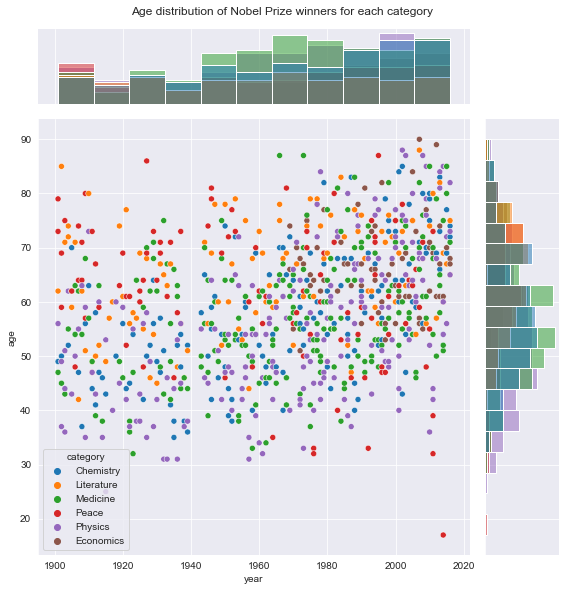

In [41]:
g = sns.JointGrid(data=df, x="year", y="age", hue="category",height=8)
g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.histplot)
g.fig.suptitle('Age distribution of Nobel Prize winners for each category',y=1.02)

 <h3>Age differences between prize categories</h3>

Text(0.5, 1.02, 'Age differences between prize categories')

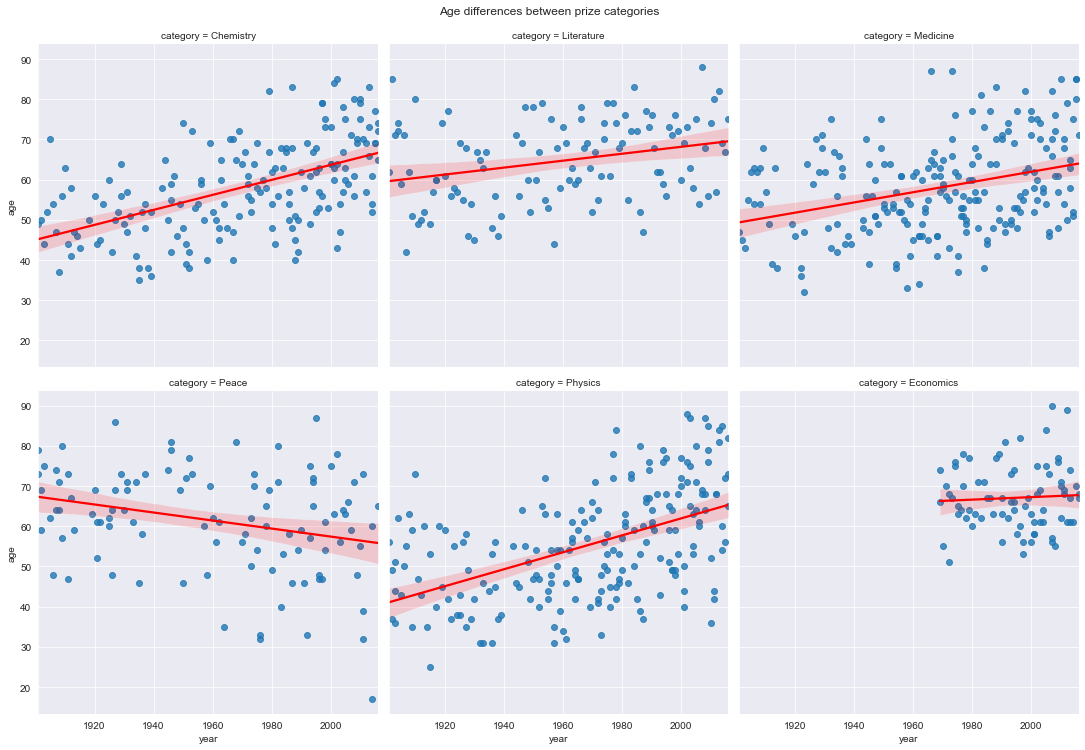

In [42]:
g=sns.lmplot(x='year',y='age',data=df,col='category',col_wrap=3,line_kws={'color':'red'})
g.fig.suptitle('Age differences between prize categories',y=1.02)

<p>The plot above shows us a lot! We see that people use to be around 55 when they received the price, but nowadays the average is closer to 65. But there is a large spread in the winners' ages, and while most are 50+, some are very young</p>
<p>We also see that the density of points is much high nowadays than in the early 1900s -- nowadays many more of the prizes are shared, and so there are many more winners. We also see that there was a disruption in awarded prizes around the Second World War (1939 - 1945).</p>

<h3>Oldest and youngest winners</h3>

 We see that both winners of the chemistry, medicine, and physics prize have gotten older over time. The trend is strongest for physics: the average age used to be below 50, and now it's almost 70. Literature and economics are more stable. We also see that economics is a newer category. But peace shows an opposite trend where winners are getting younger!

In [60]:
# The oldest winner of a Nobel Prize as of 2016
oldest=df.nlargest(1,'age')
display(oldest)
# The youngest winner of a Nobel Prize as of 2016
youngest=df.nsmallest(1,'age')
youngest

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade,female_winner,age
793,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,...,Male,University of Minnesota,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,2000,False,90.0


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade,female_winner,age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,...,Female,NaN,NaN,NaN,NaN,NaN,NaN,2010,True,17.0
